# **Daily Minimum Temperatures Dataset**

## Hi·ªÉu d·ªØ li·ªáu (Dataset & Problem Definition)

### **T·∫£i b·ªô d·ªØ li·ªáu**

In [ ]:
!gdown 1PWPwhW8QNOhPSOA1AtT7cu8-Uaxwo5UX

Downloading...
From: https://drive.google.com/uc?id=1PWPwhW8QNOhPSOA1AtT7cu8-Uaxwo5UX
To: /home/banhmuy/zero-to-hero/AIO2025/M03/tue_w01_practice/timeseries_daily-minimum-temperatures.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 55.9k/55.9k [00:00<00:00, 703kB/s]


### **Import th∆∞ vi·ªán v√† load dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ƒê·ªçc v√† chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu Date sang d·∫°ng datetime

In [4]:
DATASET_PATH = 'timeseries_daily-minimum-temperatures.csv'

In [ ]:
# Read data from .csv file
ts_df = pd.read_csv(DATASET_PATH, parse_dates=["Date"])

print(ts_df.shape)
print(ts_df.dtypes)
ts_df.head(3)

(3650, 2)
Date                          datetime64[ns]
Daily minimum temperatures            object
dtype: object


Date Daily minimum temperatures
0 1981-01-01                       20.7
1 1981-01-02                       17.9
2 1981-01-03                       18.8

D·ªØ li·ªáu c√≥ 3650 d√≤ng, 2 c·ªôt

In [13]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3650 non-null   datetime64[ns]
 1   Daily minimum temperatures  3650 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 57.2+ KB


- Kh√¥ng c√≥ d√≤ng d·ªØ li·ªáu n√†o b·ªã thi·∫øu gi√° tr·ªã
- Kh√¥ng c√≥ d√≤ng b·ªã tr√πng l·∫∑p

In [15]:
print("Missing values:", ts_df.isnull().sum().values[0])
print("Duplicate rows:", ts_df.duplicated().sum())

Missing values: 0
Duplicate rows: 0


In [16]:
ts_df['Date'] = pd.to_datetime(ts_df['Date'])
# ts_df = ts_df.set_index('Date')
ts_df.head(3)

Date Daily minimum temperatures
0 1981-01-01                       20.7
1 1981-01-02                       17.9
2 1981-01-03                       18.8

In [ ]:
ts_df = pd.read_csv(DATASET_PATH, index_col=0, parse_dates=True)
ts_df['Year'] = ts_df.index.year
ts_df['Month'] = ts_df.index.month
ts_df['Weekday Name'] = ts_df.index.day_name()

ts_df.sample(5, random_state=0)

Daily minimum temperatures  Year  Month Weekday Name
Date                                                           
1990-08-20                        9.7  1990      8       Monday
1982-07-24                        6.6  1982      7     Saturday
1983-09-19                         12  1983      9       Monday
1986-09-28                        6.9  1986      9       Sunday
1988-01-12                       18.3  1988      1      Tuesday

In [42]:
ts_df.dtypes

Daily minimum temperatures    object
Year                           int32
Month                          int32
Weekday Name                  object
dtype: object

In [43]:

ts_df['Daily minimum temperatures'] = pd.to_numeric(
    ts_df['Daily minimum temperatures'], errors='coerce')
ts_df.dtypes

Daily minimum temperatures    float64
Year                            int32
Month                           int32
Weekday Name                   object
dtype: object

In [44]:
ts_df.describe()

Daily minimum temperatures         Year        Month
count                 3647.000000  3650.000000  3650.000000
mean                    11.186647  1985.500000     6.520548
std                      4.061671     2.872675     3.447566
min                      0.000000  1981.000000     1.000000
25%                      8.300000  1983.000000     4.000000
50%                     11.000000  1985.500000     7.000000
75%                     14.000000  1988.000000    10.000000
max                     26.300000  1990.000000    12.000000

### **Time-based indexing**

In [5]:
ts_df = pd.read_csv(DATASET_PATH, index_col=0, parse_dates=True)

# Bu·ªôc c·ªôt nhi·ªát ƒë·ªô v·ªÅ d·∫°ng s·ªë (float), chuy·ªÉn c√°c gi√° tr·ªã kh√¥ng h·ª£p l·ªá (nh∆∞ chu·ªói header b·ªã s√≥t) th√†nh NaN.
ts_df['Daily minimum temperatures'] = pd.to_numeric(
    ts_df['Daily minimum temperatures'],
    errors='coerce'
)

In [6]:
ts_df.loc['1990-01-01':'1991-01-01']

Daily minimum temperatures
Date                                  
1990-01-01                        14.8
1990-01-02                        13.3
1990-01-03                        15.6
1990-01-04                        14.5
1990-01-05                        14.3
...                                ...
1990-12-27                        14.0
1990-12-28                        13.6
1990-12-29                        13.5
1990-12-30                        15.7
1990-12-31                        13.0

[365 rows x 1 columns]

In [7]:
ts_df.loc['1990-01']

Daily minimum temperatures
Date                                  
1990-01-01                        14.8
1990-01-02                        13.3
1990-01-03                        15.6
1990-01-04                        14.5
1990-01-05                        14.3
1990-01-06                        15.3
1990-01-07                        16.4
1990-01-08                        14.8
1990-01-09                        17.4
1990-01-10                        18.8
1990-01-11                        22.1
1990-01-12                        19.0
1990-01-13                        15.5
1990-01-14                        15.8
1990-01-15                        14.7
1990-01-16                        10.7
1990-01-17                        11.5
1990-01-18                        15.0
1990-01-19                        14.5
1990-01-20                        14.5
1990-01-21                        13.3
1990-01-22                        14.3
1990-01-23                        14.3
1990-01-24                        20.5
1990-01-25                        15.0
1990-01-26                        17.1
1990-01-27                        16.9
1990-01-28                        16.9
1990-01-29                        13.6
1990-01-30                        16.4
1990-01-31                        16.1

### **Frequencies**

In [11]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [12]:
pd.date_range('2004-09-20', periods=8, freq='h')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [13]:
# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['1981-01-01', '1981-01-04', '1981-01-08'])
# Select the specified dates and just the Consumption column
consum_sample = ts_df.loc[times_sample, ['Daily minimum temperatures']].copy()
consum_sample

Daily minimum temperatures
1981-01-01                        20.7
1981-01-04                        14.6
1981-01-08                        17.4

In [20]:
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')
# Create a column with missings forward filled
consum_freq['Daily minimum temperatures - Forward Fill'] = consum_sample.asfreq(
    'D', method='ffill')
consum_freq

Daily minimum temperatures  \
1981-01-01                        20.7   
1981-01-02                         NaN   
1981-01-03                         NaN   
1981-01-04                        14.6   
1981-01-05                         NaN   
1981-01-06                         NaN   
1981-01-07                         NaN   
1981-01-08                        17.4   

            Daily minimum temperatures - Forward Fill  
1981-01-01                                       20.7  
1981-01-02                                       20.7  
1981-01-03                                       20.7  
1981-01-04                                       14.6  
1981-01-05                                       14.6  
1981-01-06                                       14.6  
1981-01-07                                       14.6  
1981-01-08                                       17.4

## Kh√°m ph√° d·ªØ li·ªáu (Exploratory Data Analysis) v√† Feature Engineering

In [76]:
from matplotlib.dates import YearLocator, DateFormatter

# ==============================================================================
# THI·∫æT L·∫¨P C·∫§U H√åNH TO√ÄN C·ª§C (GLOBAL CONFIGURATION)
# M·ª•c ƒë√≠ch: T·∫≠p trung t·∫•t c·∫£ c√°c tham s·ªë c·ªßa M√¥ h√¨nh Sinusoidal v√† Ph√¢n t√≠ch
# ==============================================================================
CONFIG = {
    # C·∫•u h√¨nh M√¥ h√¨nh Sinusoidal: y = A * sin(b*x + c) + d

    # BASE_TEMP_D (d): Nhi·ªát ƒë·ªô trung b√¨nh/ƒê·ªô cao c∆° s·ªü h√†ng nƒÉm t·∫°i Melbourne: https://en.wikipedia.org/wiki/Climate_of_Melbourne
    "BASE_TEMP_D": 9.7,

    # AMPLITUDE_A (A): Bi√™n ƒë·ªô dao ƒë·ªông (L√Ω thuy·∫øt)
    # D·ªØ li·ªáu l·∫•y t·ª´ Wikipedia (Trung b√¨nh t·ªëi thi·ªÉu h√†ng th√°ng t·∫°i S√¢n bay Melbourne):
    # Nhi·ªát ƒë·ªô Min Max (Th√°ng 2) = 14.4 ¬∞C; Nhi·ªát ƒë·ªô Min Min (Th√°ng 7) = 5.8 ¬∞C.
    # Ch√™nh l·ªách th·ª±c t·∫ø l√† (14.4 - 5.8) = 8.6 ¬∞C. Gi√° tr·ªã 8 ¬∞C ƒë∆∞·ª£c ch·ªçn ƒë·ªÉ l√†m tr√≤n v√† l√†m m∆∞·ª£t bi√™n ƒë·ªô n√†y.
    "AMPLITUDE_A": 8,

    # DAYS_IN_YEAR (T): Chu k·ª≥ c·ªßa h√†m Sin (365.25 ng√†y/nƒÉm)
    "DAYS_IN_YEAR": 365.25,

    # DAYS_TO_SHIFT_PEAK (c - t√≠nh b·∫±ng ng√†y): D·ªãch pha
    # Gi√° tr·ªã 60 ng√†y ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ d·ªãch chuy·ªÉn ƒë·ªânh s√≥ng Sin (m√πa n√≥ng nh·∫•t) t·ª´
    # v·ªã tr√≠ m·∫∑c ƒë·ªãnh (kho·∫£ng Th√°ng 4) v·ªÅ Th√°ng 2, ph√π h·ª£p v·ªõi d·ªØ li·ªáu kh√≠ h·∫≠u th·ª±c t·∫ø.
    "DAYS_TO_SHIFT_PEAK": 60,

    # C·∫•u h√¨nh K·ªπ thu·∫≠t Ph√¢n t√≠ch
    "ROLLING_WINDOW_DAYS": 30,      # C·ª≠a s·ªï (s·ªë ng√†y) t√≠nh Trung b√¨nh Tr∆∞·ª£t

    # C·∫•u h√¨nh Ng√¥n ng·ªØ/Hi·ªÉn th·ªã
    "MONTH_NAMES": {
        1: 'Th√°ng 1', 2: 'Th√°ng 2', 3: 'Th√°ng 3', 4: 'Th√°ng 4',
        5: 'Th√°ng 5', 6: 'Th√°ng 6', 7: 'Th√°ng 7', 8: 'Th√°ng 8',
        9: 'Th√°ng 9', 10: 'Th√°ng 10', 11: 'Th√°ng 11', 12: 'Th√°ng 12'
    }
}

# ------------------------------------------------------------------------------
print("\n--- 1. T√çNH TO√ÅN C√ÅC H·∫∞NG S·ªê D·∫™N XU·∫§T (DERIVED CONSTANTS) ---")
# C√°c tham s·ªë ƒë∆∞·ª£c chuy·ªÉn ƒë·ªïi sang ƒë∆°n v·ªã radian cho h√†m np.sin()

# ANGULAR_FREQUENCY_B (b): T·∫ßn s·ªë g√≥c = 2*pi / Chu k·ª≥ (365.25)
CONFIG["ANGULAR_FREQUENCY_B"] = (2 * np.pi) / CONFIG["DAYS_IN_YEAR"]
print(f"T·∫ßn s·ªë g√≥c (b): {CONFIG['ANGULAR_FREQUENCY_B']:.6f}")

# PHASE_SHIFT_RADIAN_C (c - t√≠nh b·∫±ng radian): D·ªãch pha
CONFIG["PHASE_SHIFT_RADIAN_C"] = (2 * np.pi * CONFIG["DAYS_TO_SHIFT_PEAK"]) / CONFIG["DAYS_IN_YEAR"]
print(f"D·ªãch pha (c): {CONFIG['PHASE_SHIFT_RADIAN_C']:.6f} radians")


--- 1. T√çNH TO√ÅN C√ÅC H·∫∞NG S·ªê D·∫™N XU·∫§T (DERIVED CONSTANTS) ---
T·∫ßn s·ªë g√≥c (b): 0.017202
D·ªãch pha (c): 1.032145 radians


In [77]:
# ==============================================================================
print("\n--- 2. PH·∫¶N 1: D·ªÆ LI·ªÜU TH·ª∞C V√Ä T√çNH TO√ÅN M√î H√åNH ---")
# ==============================================================================

# 1. D·ªÆ LI·ªÜU TH·ª∞C T·∫æ
ts_df = pd.read_csv(DATASET_PATH, index_col=0, parse_dates=True)

# Bu·ªôc c·ªôt nhi·ªát ƒë·ªô v·ªÅ d·∫°ng s·ªë (float), chuy·ªÉn c√°c gi√° tr·ªã kh√¥ng h·ª£p l·ªá (nh∆∞ chu·ªói header b·ªã s√≥t) th√†nh NaN.
ts_df['Daily minimum temperatures'] = pd.to_numeric(
    ts_df['Daily minimum temperatures'],
    errors='coerce'
)
# Lo·∫°i b·ªè c√°c d√≤ng b·ªã NaN sau khi √©p ki·ªÉu, ƒë·∫£m b·∫£o ch·ªâ c√≤n d·ªØ li·ªáu s·ªë h·ª£p l·ªá.
ts_df = ts_df.dropna(subset=['Daily minimum temperatures'])


--- 2. PH·∫¶N 1: D·ªÆ LI·ªÜU TH·ª∞C V√Ä T√çNH TO√ÅN M√î H√åNH ---


### Feature Engineering

In [78]:
# 2. T√çNH TO√ÅN V√Ä TH√äM M√î H√åNH SINUSOIDAL (SIGNAL) V√ÄO ts_df
# Ch·ªâ s·ªë th·ªùi gian (x): D·ª±a tr√™n ƒë·ªô d√†i d·ªØ li·ªáu th·ª±c t·∫ø ƒë√£ ƒë∆∞·ª£c t·∫£i
time_index = np.arange(len(ts_df))

# T√≠nh to√°n th√†nh ph·∫ßn t√≠n hi·ªáu PURE SIGNAL MODEL (S√≥ng Sin)
model_signal = (
    CONFIG["BASE_TEMP_D"] +
    CONFIG["AMPLITUDE_A"] * np.sin(
        CONFIG["ANGULAR_FREQUENCY_B"] * time_index +
        CONFIG["PHASE_SHIFT_RADIAN_C"]
    )
)
print(f"ƒê√£ t√≠nh to√°n M√¥ h√¨nh Sinusoidal")

# Th√™m c·ªôt Signal v√†o DataFrame ƒë√£ t·∫£i ƒë·ªÉ so s√°nh tr·ª±c quan
ts_df["Signal"] = model_signal
print(f"ƒê√£ th√™m c·ªôt Signal (M√¥ h√¨nh L√Ω thuy·∫øt) v√†o DataFrame ts_df.")

# ==============================================================================
print("\n--- 3. PH·∫¶N 2: PH√ÇN T√çCH CHU·ªñI TH·ªúI GIAN ---")
print("K·ªπ thu·∫≠t: Trung b√¨nh Tr∆∞·ª£t (Rolling Mean)")
# ==============================================================================
# T√≠nh Trung b√¨nh Tr∆∞·ª£t tr√™n D·ªÆ LI·ªÜU TH·ª∞C T·∫æ
ts_df['Rolling 30-Day Avg'] = ts_df['Daily minimum temperatures'].rolling(
    window=CONFIG["ROLLING_WINDOW_DAYS"],
    center=True
).mean()
print(f"ƒê√£ t√≠nh Trung b√¨nh Tr∆∞·ª£t {CONFIG['ROLLING_WINDOW_DAYS']}-Ng√†y cho D·ªØ li·ªáu Th·ª±c t·∫ø.")

ƒê√£ t√≠nh to√°n M√¥ h√¨nh Sinusoidal
ƒê√£ th√™m c·ªôt Signal (M√¥ h√¨nh L√Ω thuy·∫øt) v√†o DataFrame ts_df.

--- 3. PH·∫¶N 2: PH√ÇN T√çCH CHU·ªñI TH·ªúI GIAN ---
K·ªπ thu·∫≠t: Trung b√¨nh Tr∆∞·ª£t (Rolling Mean)
ƒê√£ t√≠nh Trung b√¨nh Tr∆∞·ª£t 30-Ng√†y cho D·ªØ li·ªáu Th·ª±c t·∫ø.


In [79]:
# ==============================================================================
print("\n--- 4. PH·∫¶N 3: PH√ÇN T√çCH THEO M√ôA (MONTHLY ANALYSIS) ---")
# ==============================================================================

# Th·ª±c hi·ªán ph√¢n t√≠ch tr√™n D·ªÆ LI·ªÜU TH·ª∞C T·∫æ
ts_df['Month'] = ts_df.index.month
monthly_avg = ts_df.groupby('Month')['Daily minimum temperatures'].mean().reset_index()
monthly_avg['Month Name'] = monthly_avg['Month'].map(CONFIG["MONTH_NAMES"])
max_temp_month = monthly_avg.loc[monthly_avg['Daily minimum temperatures'].idxmax()]
min_temp_month = monthly_avg.loc[monthly_avg['Daily minimum temperatures'].idxmin()]
print("ƒê√£ th·ª±c hi·ªán nh√≥m d·ªØ li·ªáu theo Th√°ng v√† t√≠nh Trung b√¨nh m·ªói th√°ng tr√™n D·ªÆ LI·ªÜU TH·ª∞C T·∫æ.")

# In k·∫øt qu·∫£ ph√¢n t√≠ch ra Console
print("\n--- K·∫æT QU·∫¢ PH√ÇN T√çCH NHI·ªÜT ƒê·ªò TRUNG B√åNH THEO TH√ÅNG (D·ªØ li·ªáu Th·ª±c t·∫ø) ---")
print(f"Th√°ng N√ìNG NH·∫§T (trung b√¨nh): {max_temp_month['Month Name']} ({max_temp_month['Daily minimum temperatures']:.2f} ¬∞C)")
print(f"Th√°ng L·∫†NH NH·∫§T (trung b√¨nh): {min_temp_month['Month Name']} ({min_temp_month['Daily minimum temperatures']:.2f} ¬∞C)")
print("---------------------------------------------------------------")


--- 4. PH·∫¶N 3: PH√ÇN T√çCH THEO M√ôA (MONTHLY ANALYSIS) ---
ƒê√£ th·ª±c hi·ªán nh√≥m d·ªØ li·ªáu theo Th√°ng v√† t√≠nh Trung b√¨nh m·ªói th√°ng tr√™n D·ªÆ LI·ªÜU TH·ª∞C T·∫æ.

--- K·∫æT QU·∫¢ PH√ÇN T√çCH NHI·ªÜT ƒê·ªò TRUNG B√åNH THEO TH√ÅNG (D·ªØ li·ªáu Th·ª±c t·∫ø) ---
Th√°ng N√ìNG NH·∫§T (trung b√¨nh): Th√°ng 2 (15.37 ¬∞C)
Th√°ng L·∫†NH NH·∫§T (trung b√¨nh): Th√°ng 7 (6.75 ¬∞C)
---------------------------------------------------------------


In [80]:
ts_df.describe()

Daily minimum temperatures       Signal  Rolling 30-Day Avg  \
count                 3647.000000  3647.000000         3618.000000   
mean                    11.186647     9.690009           11.148601   
std                      4.061671     5.656034            3.089969   
min                      0.000000     1.700005            4.710000   
25%                      8.300000     4.040109            8.364167   
50%                     11.000000     9.682798           11.020000   
75%                     14.000000    15.341629           13.753333   
max                     26.300000    17.699995           17.966667   

             Month  
count  3647.000000  
mean      6.520154  
std       3.448957  
min       1.000000  
25%       4.000000  
50%       7.000000  
75%      10.000000  
max      12.000000

### Ph√¢n t√≠ch T√≠nh th·ªùi v·ª• (Seasonality Analysis) - EDA step

ƒê√£ v·∫Ω Bi·ªÉu ƒë·ªì Chu·ªói Th·ªùi gian (D·ªØ li·ªáu Th·ª±c t·∫ø v√† M√¥ h√¨nh).


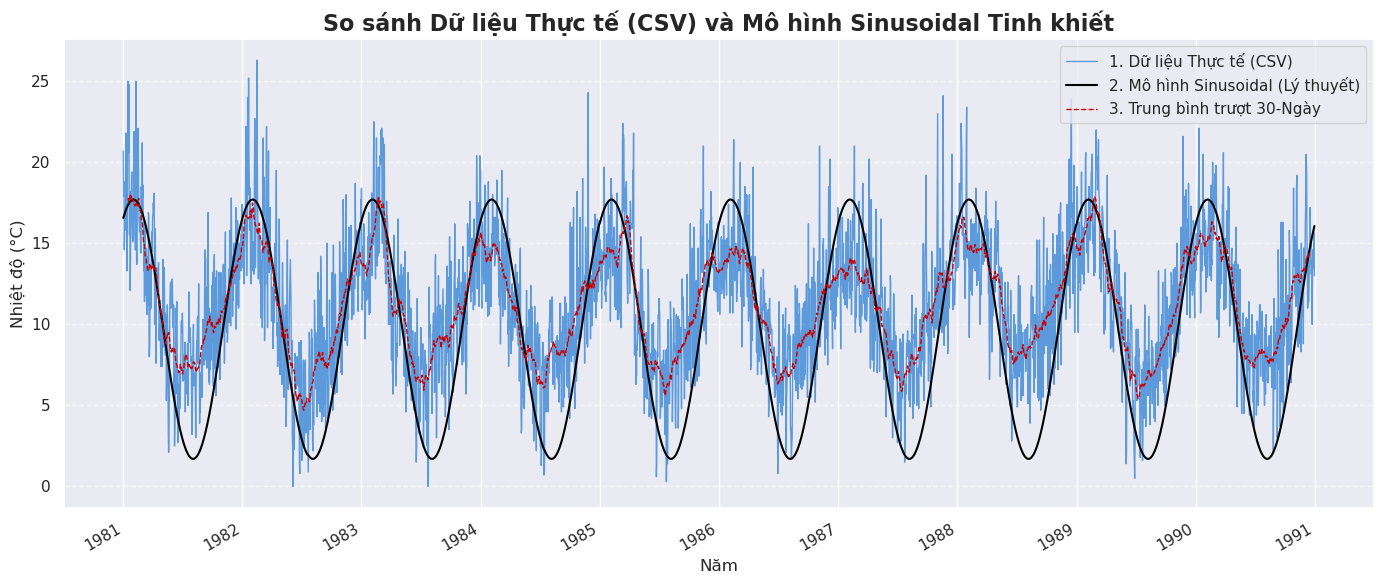

In [81]:
# Thi·∫øt l·∫≠p bi·ªÉu ƒë·ªì
plt.figure(figsize=(14, 6))

# V·∫º 1: D·ªÆ LI·ªÜU TH·ª∞C T·∫æ (ƒê·ªçc t·ª´ CSV)
plt.plot(
    ts_df.index,
    ts_df["Daily minimum temperatures"],
    color="#0066CC",
    linewidth=1.0,
    alpha=0.6,
    label="1. D·ªØ li·ªáu Th·ª±c t·∫ø (CSV)"
)

# V·∫º 2: M√î H√åNH L√ù THUY·∫æT (PURE SIGNAL) - ƒê∆∞·ªùng tham chi·∫øu S√≥ng Sin
plt.plot(
    ts_df.index,
    ts_df["Signal"],
    color="#000000",
    linewidth=1.5,
    linestyle='-',
    label="2. M√¥ h√¨nh Sinusoidal (L√Ω thuy·∫øt)"
)

# V·∫º 3: Trung b√¨nh tr∆∞·ª£t (Smoothed Data) - L√†m m∆∞·ª£t D·ªØ li·ªáu Th·ª±c t·∫ø
plt.plot(
    ts_df.index,
    ts_df["Rolling 30-Day Avg"],
    color="#CC0000",
    linewidth=1.0,
    linestyle='--',
    label=f"3. Trung b√¨nh tr∆∞·ª£t {CONFIG['ROLLING_WINDOW_DAYS']}-Ng√†y"
)

# C·∫£i thi·ªán Tr·ª•c X (Th·ªùi gian)
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

# Ti√™u ƒë·ªÅ v√† ch√∫ th√≠ch
plt.title(
    "So s√°nh D·ªØ li·ªáu Th·ª±c t·∫ø (CSV) v√† M√¥ h√¨nh Sinusoidal Tinh khi·∫øt",
    fontsize=16,
    fontweight='bold'
)
plt.xlabel("NƒÉm", fontsize=12)
plt.ylabel("Nhi·ªát ƒë·ªô (¬∞C)", fontsize=12)
plt.legend(loc='upper right', frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
print("ƒê√£ v·∫Ω Bi·ªÉu ƒë·ªì Chu·ªói Th·ªùi gian (D·ªØ li·ªáu Th·ª±c t·∫ø v√† M√¥ h√¨nh).")

ƒê√£ v·∫Ω Bi·ªÉu ƒë·ªì Thanh ph√¢n t√≠ch theo Th√°ng.


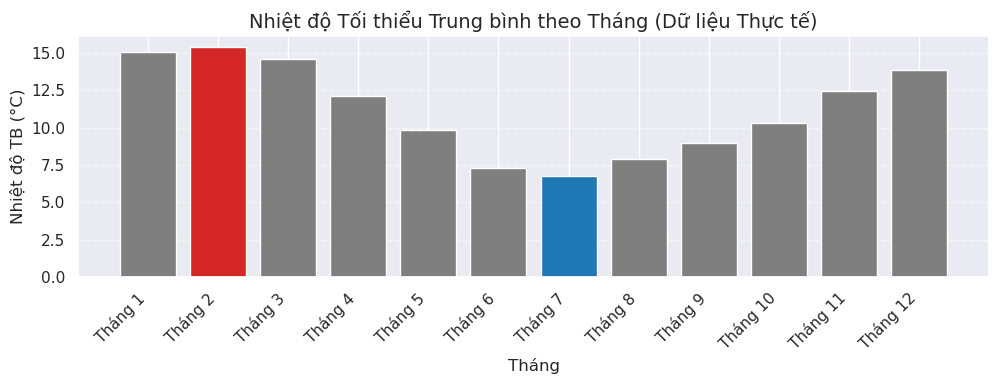

In [82]:
# V·∫º BI·ªÇU ƒê·ªí THANH CHO PH√ÇN T√çCH THEO TH√ÅNG
plt.figure(figsize=(10, 4))
color_map = ['tab:red' if m == max_temp_month['Month Name'] else 'tab:blue' if m == min_temp_month['Month Name'] else 'tab:grey' for m in monthly_avg['Month Name']]

plt.bar(
    monthly_avg['Month Name'],
    monthly_avg['Daily minimum temperatures'],
    color=color_map
)
plt.title("Nhi·ªát ƒë·ªô T·ªëi thi·ªÉu Trung b√¨nh theo Th√°ng (D·ªØ li·ªáu Th·ª±c t·∫ø)", fontsize=14)
plt.xlabel("Th√°ng", fontsize=12)
plt.ylabel("Nhi·ªát ƒë·ªô TB (¬∞C)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
print("ƒê√£ v·∫Ω Bi·ªÉu ƒë·ªì Thanh ph√¢n t√≠ch theo Th√°ng.")

# Hi·ªÉn th·ªã t·∫•t c·∫£ bi·ªÉu ƒë·ªì
plt.show()


Minh h·ªça d·ªØ li·ªáu theo t·ª´ng nƒÉm 

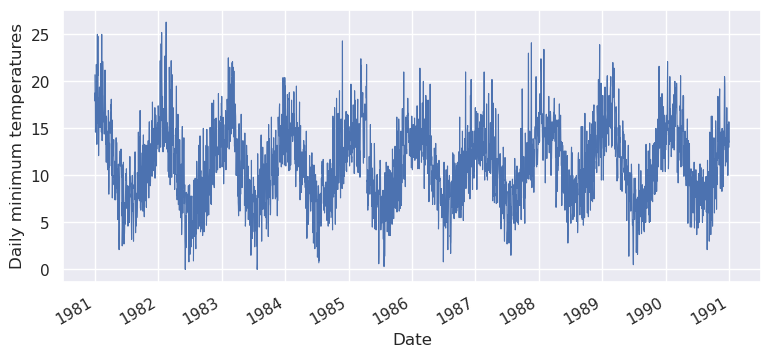

In [8]:
ts_df = pd.read_csv(DATASET_PATH, index_col=0, parse_dates=True)

# Bu·ªôc c·ªôt nhi·ªát ƒë·ªô v·ªÅ d·∫°ng s·ªë (float), chuy·ªÉn c√°c gi√° tr·ªã kh√¥ng h·ª£p l·ªá (nh∆∞ chu·ªói header b·ªã s√≥t) th√†nh NaN.
ts_df['Daily minimum temperatures'] = pd.to_numeric(
    ts_df['Daily minimum temperatures'],
    errors='coerce'
)

sns.set(rc={'figure.figsize':(9, 4)})
col_to_plot = 'Daily minimum temperatures'
ts_df[col_to_plot].plot(linewidth=0.8)
plt.ylabel(col_to_plot)
plt.show()

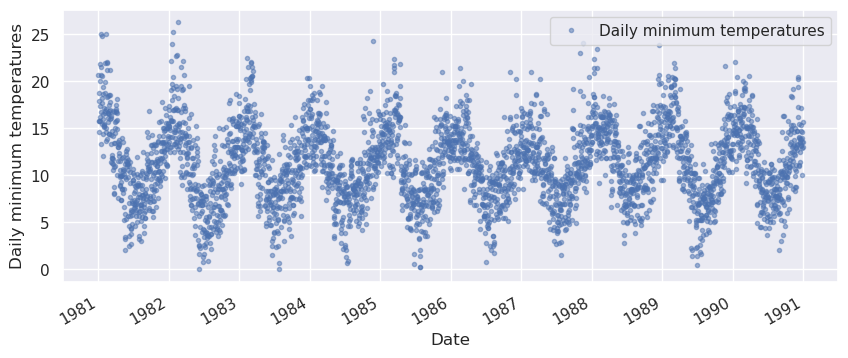

In [9]:
cols_plot = ['Daily minimum temperatures']
ts_df[cols_plot].plot(
    marker='.',
    alpha=0.5,
    linestyle='None',
    figsize=(10, 4),
    subplots=True
)
plt.ylabel('Daily minimum temperatures')
plt.show()

### **Ph√°t hi·ªán outliers**



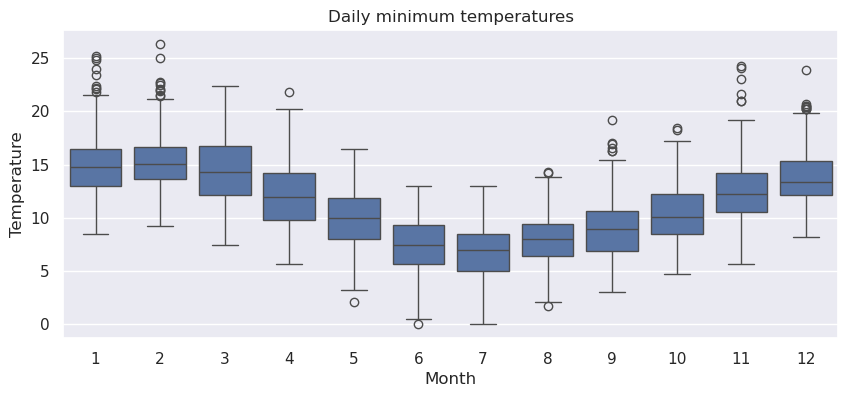

In [10]:
ts_df = pd.read_csv(DATASET_PATH, index_col=0, parse_dates=True)
ts_df['Year'] = ts_df.index.year
ts_df['Month'] = ts_df.index.month
ts_df['Weekday Name'] = ts_df.index.day_name()
# Bu·ªôc c·ªôt nhi·ªát ƒë·ªô v·ªÅ d·∫°ng s·ªë (float), chuy·ªÉn c√°c gi√° tr·ªã kh√¥ng h·ª£p l·ªá (nh∆∞ chu·ªói header b·ªã s√≥t) th√†nh NaN.
ts_df['Daily minimum temperatures'] = pd.to_numeric(
    ts_df['Daily minimum temperatures'],
    errors='coerce'
)
COL_NAME = 'Daily minimum temperatures'
plt.figure(figsize=(10, 4))
sns.boxplot(data=ts_df, x='Month', y=COL_NAME)
plt.ylabel('Temperature')
plt.title(COL_NAME)
plt.show()

### **Resampling - Feature engineering** 

In [15]:
data_columns = ['Daily minimum temperatures']
ts_weekly_mean = ts_df[data_columns].resample('W').mean()
ts_weekly_mean.head(3)

Daily minimum temperatures
Date                                  
1981-01-04                   18.000000
1981-01-11                   17.542857
1981-01-18                   20.371429

In [16]:
print(ts_df.shape[0])
print(ts_weekly_mean.shape[0])

3650
523


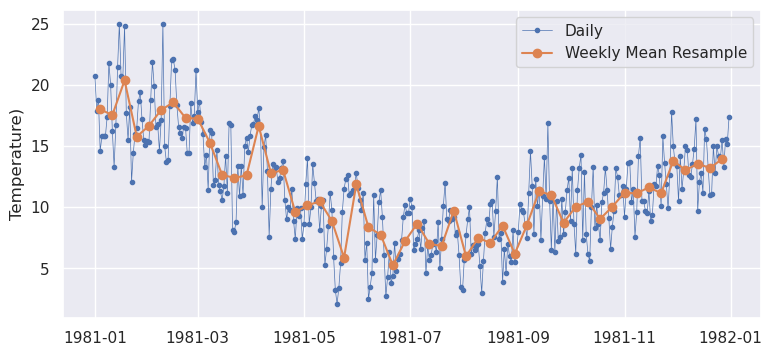

In [17]:
# Start and end of the date range to extract
start, end = '1981-01', '1981-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(ts_df.loc[start:end, 'Daily minimum temperatures'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(ts_weekly_mean.loc[start:end, 'Daily minimum temperatures'],
marker='o', linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Temperature)')
ax.legend()
plt.show()

In [18]:
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
ts_annual_df = ts_df[data_columns].resample('A').sum(min_count=360)
# The default index of the resampled DataFrame is the last day of each year
# to the year component
ts_annual_df = ts_annual_df.set_index(ts_annual_df.index.year)
ts_annual_df.index.name = 'Year'
# Compute the ratio of Wind+Solar to Consumption
ts_annual_df.tail(3)

/tmp/ipykernel_142825/3750515818.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts_annual_df = ts_df[data_columns].resample('A').sum(min_count=360)


Daily minimum temperatures
Year                            
1988                      4369.8
1989                      4110.6
1990                      4259.4

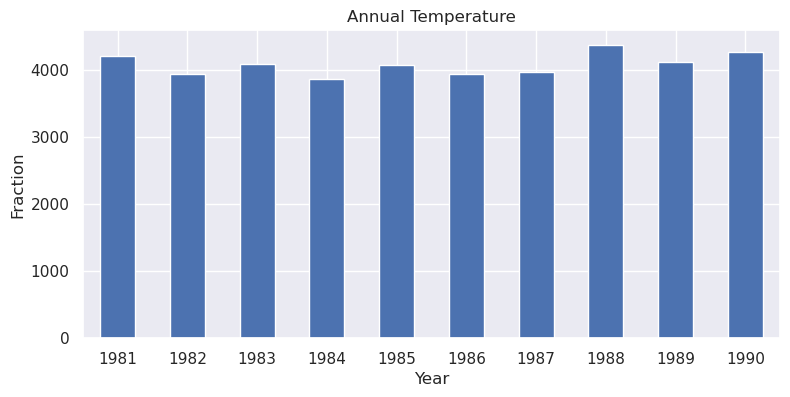

In [19]:
# Plot from 1981 onwards, because there is no solar production data in earlier years
ax = ts_annual_df.loc[1981:, 'Daily minimum temperatures'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_title('Annual Temperature')
plt.xticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv('timeseries_daily-minimum-temperatures.csv')

print("===== KI·ªÇM TRA D·ªÆ LI·ªÜU BAN ƒê·∫¶U =====")
print(f"Shape: {df.shape}")
print(f"\nC√°c c·ªôt trong dataset:")
print(df.columns.tolist())
print(f"\nTh√¥ng tin c√°c c·ªôt:")
print(df.info())
print(f"\n5 d√≤ng ƒë·∫ßu:")
print(df.head())
print(f"\nKi·ªÉu d·ªØ li·ªáu:")
print(df.dtypes)

# T·ª± ƒë·ªông t√¨m t√™n c·ªôt nhi·ªát ƒë·ªô (c·ªôt s·ªë kh√¥ng ph·∫£i Date)
date_col = None
temp_col = None

for col in df.columns:
    col_lower = col.lower()
    if 'date' in col_lower:
        date_col = col
    elif df[col].dtype in ['float64', 'int64', 'float32', 'int32']:
        temp_col = col

# N·∫øu kh√¥ng t√¨m th·∫•y, th·ª≠ c·ªôt th·ª© 2
if temp_col is None:
    temp_col = df.columns[1]
if date_col is None:
    date_col = df.columns[0]

print(f"\n‚úì C·ªôt Date: {date_col}")
print(f"‚úì C·ªôt Temperature: {temp_col}")

# Chuy·ªÉn ƒë·ªïi ki·ªÉu d·ªØ li·ªáu
df[date_col] = pd.to_datetime(df[date_col])
df[temp_col] = pd.to_numeric(df[temp_col], errors='coerce')

# Lo·∫°i b·ªè missing values
df = df.dropna()
df = df.sort_values(date_col)
df = df.reset_index(drop=True)

print(f"\nShape sau khi x·ª≠ l√Ω: {df.shape}")
print(f"Th·ªëng k√™ nhi·ªát ƒë·ªô:")
print(df[temp_col].describe())

# ===== FEATURE ENGINEERING =====

def create_time_series_features(df, target_col, date_col):
    """
    T·∫°o c√°c features cho time series
    """
    df_features = df.copy()

    # 1. TIME-BASED FEATURES (ƒê·∫∑c tr∆∞ng th·ªùi gian)
    df_features['year'] = df_features[date_col].dt.year
    df_features['month'] = df_features[date_col].dt.month
    df_features['day'] = df_features[date_col].dt.day
    df_features['dayofweek'] = df_features[date_col].dt.dayofweek
    df_features['dayofyear'] = df_features[date_col].dt.dayofyear
    df_features['quarter'] = df_features[date_col].dt.quarter
    df_features['weekofyear'] = df_features[date_col].dt.isocalendar().week.astype(int)

    # 2. CYCLIC FEATURES (ƒê·∫∑c tr∆∞ng tu·∫ßn ho√†n)
    df_features['month_sin'] = np.sin(2 * np.pi * df_features['month'] / 12)
    df_features['month_cos'] = np.cos(2 * np.pi * df_features['month'] / 12)
    df_features['day_sin'] = np.sin(2 * np.pi * df_features['day'] / 31)
    df_features['day_cos'] = np.cos(2 * np.pi * df_features['day'] / 31)
    df_features['dayofyear_sin'] = np.sin(2 * np.pi * df_features['dayofyear'] / 365)
    df_features['dayofyear_cos'] = np.cos(2 * np.pi * df_features['dayofyear'] / 365)

    # 3. LAG FEATURES (Gi√° tr·ªã qu√° kh·ª©)
    for lag in [1, 2, 3, 7, 14, 30]:
        df_features[f'temp_lag_{lag}'] = df_features[target_col].shift(lag)

    # 4. ROLLING WINDOW FEATURES (ƒê·∫∑c tr∆∞ng c·ª≠a s·ªï tr∆∞·ª£t)
    for window in [3, 7, 14, 30]:
        df_features[f'temp_rolling_mean_{window}'] = df_features[target_col].rolling(window=window, min_periods=1).mean()
        df_features[f'temp_rolling_std_{window}'] = df_features[target_col].rolling(window=window, min_periods=1).std()
        df_features[f'temp_rolling_min_{window}'] = df_features[target_col].rolling(window=window, min_periods=1).min()
        df_features[f'temp_rolling_max_{window}'] = df_features[target_col].rolling(window=window, min_periods=1).max()

    # 5. EXPANDING WINDOW FEATURES (ƒê·∫∑c tr∆∞ng m·ªü r·ªông)
    df_features['temp_expanding_mean'] = df_features[target_col].expanding(min_periods=1).mean()
    df_features['temp_expanding_std'] = df_features[target_col].expanding(min_periods=1).std()

    # 6. DIFFERENCE FEATURES (ƒê·∫∑c tr∆∞ng s·ª± thay ƒë·ªïi)
    df_features['temp_diff_1'] = df_features[target_col].diff(1)
    df_features['temp_diff_7'] = df_features[target_col].diff(7)

    # 7. EXPONENTIAL WEIGHTED FEATURES
    df_features['temp_ewm_mean_7'] = df_features[target_col].ewm(span=7, min_periods=1).mean()
    df_features['temp_ewm_std_7'] = df_features[target_col].ewm(span=7, min_periods=1).std()

    return df_features

# T·∫°o features
print("\n===== T·∫†O FEATURES =====")
df_features = create_time_series_features(df, temp_col, date_col)

print(f"S·ªë l∆∞·ª£ng features: {len(df_features.columns)}")
print(f"\nDanh s√°ch features:")
for i, col in enumerate(df_features.columns, 1):
    print(f"{i}. {col}")

# X·ª≠ l√Ω missing values
print(f"\n\nMissing values:")
missing_counts = df_features.isnull().sum()
if missing_counts.sum() > 0:
    print(missing_counts[missing_counts > 0].sort_values(ascending=False))
    df_features = df_features.dropna()
    print(f"\nShape sau khi x·ª≠ l√Ω missing values: {df_features.shape}")
else:
    print("Kh√¥ng c√≥ missing values!")

# ===== CHU·∫®N B·ªä D·ªÆ LI·ªÜU CHO TRAINING =====

# T√°ch features v√† target
feature_columns = [col for col in df_features.columns if col not in [date_col, temp_col]]
X = df_features[feature_columns]
y = df_features[temp_col]

print(f"\n===== CHU·∫®N B·ªä D·ªÆ LI·ªÜU =====")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Chia train/test theo th·ªùi gian (80/20)
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Train date range: {df_features[date_col].iloc[0]} to {df_features[date_col].iloc[split_idx-1]}")
print(f"Test date range: {df_features[date_col].iloc[split_idx]} to {df_features[date_col].iloc[-1]}")

# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Chuy·ªÉn v·ªÅ DataFrame ƒë·ªÉ gi·ªØ t√™n c·ªôt
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns, index=X_test.index)

print("\n===== D·ªÆ LI·ªÜU ƒê√É CHU·∫®N B·ªä XONG =====")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print("\nM·∫´u d·ªØ li·ªáu X_train_scaled (5 d√≤ng ƒë·∫ßu):")
print(X_train_scaled.head())
print("\nTh·ªëng k√™ y_train:")
print(y_train.describe())

# Ki·ªÉm tra kh√¥ng c√≥ NaN ho·∫∑c Inf
print("\n===== KI·ªÇM TRA D·ªÆ LI·ªÜU =====")
print(f"NaN trong X_train_scaled: {X_train_scaled.isnull().sum().sum()}")
print(f"NaN trong X_test_scaled: {X_test_scaled.isnull().sum().sum()}")
print(f"Inf trong X_train_scaled: {np.isinf(X_train_scaled.values).sum()}")
print(f"Inf trong X_test_scaled: {np.isinf(X_test_scaled.values).sum()}")

print("\n‚úÖ Feature Engineering ho√†n th√†nh!")
print("\nC√°c bi·∫øn ƒë√£ t·∫°o:")
print("- X_train_scaled, X_test_scaled: Features ƒë√£ chu·∫©n h√≥a")
print("- y_train, y_test: Target values")
print("- scaler: StandardScaler object")
print("- df_features: DataFrame ƒë·∫ßy ƒë·ªß v·ªõi t·∫•t c·∫£ features")
print(f"- temp_col = '{temp_col}'")
print(f"- date_col = '{date_col}'")

===== KI·ªÇM TRA D·ªÆ LI·ªÜU BAN ƒê·∫¶U =====
Shape: (3650, 2)

C√°c c·ªôt trong dataset:
['Date', 'Daily minimum temperatures']

Th√¥ng tin c√°c c·ªôt:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB
None

5 d√≤ng ƒë·∫ßu:
       Date Daily minimum temperatures
0  1/1/1981                       20.7
1  1/2/1981                       17.9
2  1/3/1981                       18.8
3  1/4/1981                       14.6
4  1/5/1981                       15.8

Ki·ªÉu d·ªØ li·ªáu:
Date                          object
Daily minimum temperatures    object
dtype: object

‚úì C·ªôt Date: Date
‚úì C·ªôt Temperature: Daily minimum temperatures

Shape sau khi x·ª≠ l√Ω: (3647, 2)
Th·ª

## Training

### LinearRegression


===== TRAINING LINEAR REGRESSION =====

üìä Linear Regression (Train) Evaluation:
MAE  : 0.0000
RMSE : 0.0000
R¬≤   : 1.0000

üìä Linear Regression (Test) Evaluation:
MAE  : 0.0000
RMSE : 0.0000
R¬≤   : 1.0000


/tmp/ipykernel_142825/3589912151.py:50: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/banhmuy/miniconda3/envs/ds_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


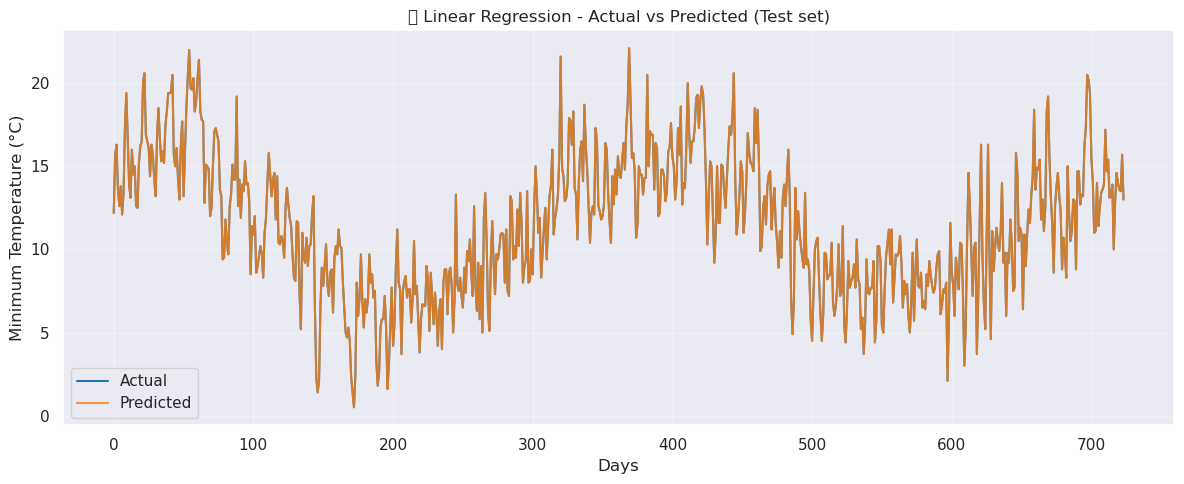


===== TOP 10 FEATURES QUAN TR·ªåNG =====
                Feature   Coefficient
13           temp_lag_1  1.598158e+00
37          temp_diff_1  1.470505e+00
16           temp_lag_7  1.379697e+00
19  temp_rolling_mean_3  1.378290e+00
38          temp_diff_7  1.308257e+00
14           temp_lag_2 -5.123627e-01
5               quarter -8.056056e-15
39      temp_ewm_mean_7  7.879114e-15
8             month_cos  6.160003e-15
12        dayofyear_cos -3.597816e-15

‚úÖ Linear Regression training completed!
- M√¥ h√¨nh tuy·∫øn t√≠nh ƒë∆°n gi·∫£n, d·ªÖ hi·ªÉu, nhanh hu·∫•n luy·ªán.
- Tuy nhi√™n, v·ªõi d·ªØ li·ªáu Time Series c√≥ t√≠nh phi tuy·∫øn cao (seasonality r√µ r·ªát), LR c√≥ th·ªÉ d·ª± b√°o ch∆∞a t·ªët ·ªü c√°c giai ƒëo·∫°n dao ƒë·ªông m·∫°nh.
- B∆∞·ªõc ti·∫øp theo: hu·∫•n luy·ªán Random Forest v√† XGBoost ƒë·ªÉ so s√°nh.


In [30]:
# ============================
# TRAIN LINEAR REGRESSION MODEL
# ============================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Kh·ªüi t·∫°o m√¥ h√¨nh
model_lr = LinearRegression()

# Hu·∫•n luy·ªán m√¥ h√¨nh
print("\n===== TRAINING LINEAR REGRESSION =====")
model_lr.fit(X_train_scaled, y_train)

# D·ª± ƒëo√°n
y_pred_train = model_lr.predict(X_train_scaled)
y_pred_test = model_lr.predict(X_test_scaled)

# ============================
# ƒê√ÅNH GI√Å M√î H√åNH
# ============================

def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\nüìä {model_name} Evaluation:")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R¬≤   : {r2:.4f}")
    return mae, rmse, r2

train_scores = evaluate_model(y_train, y_pred_train, "Linear Regression (Train)")
test_scores = evaluate_model(y_test, y_pred_test, "Linear Regression (Test)")

# ============================
# V·∫º BI·ªÇU ƒê·ªí D·ª∞ B√ÅO
# ============================

plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Actual", color="tab:blue")
plt.plot(y_pred_test, label="Predicted", color="tab:orange", alpha=0.8)
plt.title("üìà Linear Regression - Actual vs Predicted (Test set)")
plt.xlabel("Days")
plt.ylabel("Minimum Temperature (¬∞C)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================
# KI·ªÇM TRA C√ÅC H·ªÜ S·ªê (COEFFICIENTS)
# ============================

coef_df = pd.DataFrame({
    "Feature": X_train_scaled.columns,
    "Coefficient": model_lr.coef_
}).sort_values("Coefficient", key=lambda x: abs(x), ascending=False)

print("\n===== TOP 10 FEATURES QUAN TR·ªåNG =====")
print(coef_df.head(10))

# ============================
# K·∫æT LU·∫¨N T·∫†M TH·ªúI
# ============================

print("\n‚úÖ Linear Regression training completed!")
print("- M√¥ h√¨nh tuy·∫øn t√≠nh ƒë∆°n gi·∫£n, d·ªÖ hi·ªÉu, nhanh hu·∫•n luy·ªán.")
print("- Tuy nhi√™n, v·ªõi d·ªØ li·ªáu Time Series c√≥ t√≠nh phi tuy·∫øn cao (seasonality r√µ r·ªát), LR c√≥ th·ªÉ d·ª± b√°o ch∆∞a t·ªët ·ªü c√°c giai ƒëo·∫°n dao ƒë·ªông m·∫°nh.")
print("- B∆∞·ªõc ti·∫øp theo: hu·∫•n luy·ªán Random Forest v√† XGBoost ƒë·ªÉ so s√°nh.")



### Random Forest


===== TRAINING RANDOM FOREST =====

üìä Random Forest (Train) Evaluation:
MAE  : 0.0870
RMSE : 0.1445
R¬≤   : 0.9987

üìä Random Forest (Test) Evaluation:
MAE  : 0.2236
RMSE : 0.3468
R¬≤   : 0.9928


/tmp/ipykernel_142825/374075239.py:51: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/banhmuy/miniconda3/envs/ds_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


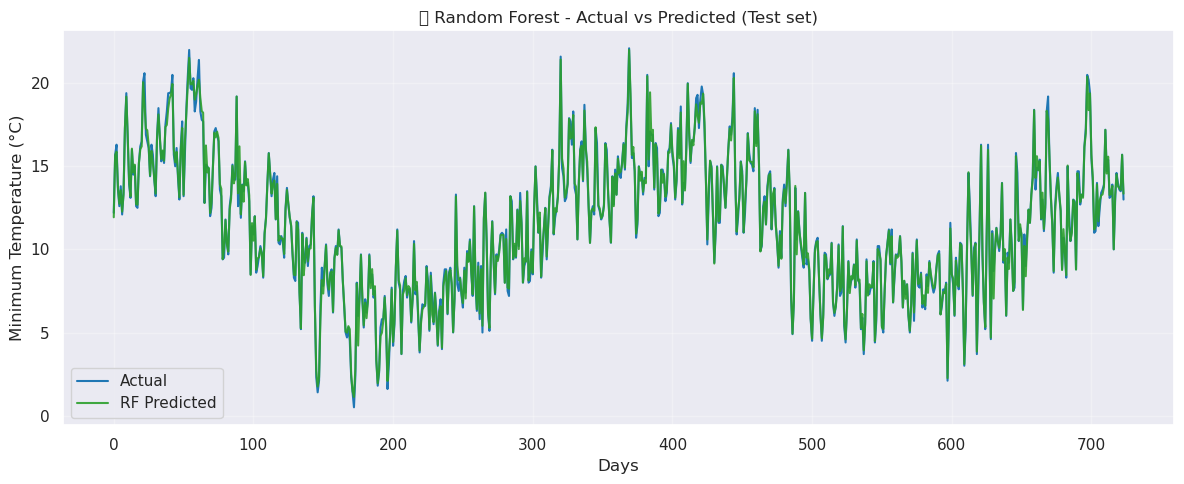


===== TOP 15 FEATURE IMPORTANCE (RF) =====
                Feature  Importance
19  temp_rolling_mean_3    0.497500
39      temp_ewm_mean_7    0.216577
37          temp_diff_1    0.112016
21   temp_rolling_min_3    0.066937
22   temp_rolling_max_3    0.052562
14           temp_lag_2    0.023431
38          temp_diff_7    0.011560
13           temp_lag_1    0.007858
20   temp_rolling_std_3    0.001536
16           temp_lag_7    0.001344
40       temp_ewm_std_7    0.001104
15           temp_lag_3    0.000615
26   temp_rolling_max_7    0.000461
25   temp_rolling_min_7    0.000449
24   temp_rolling_std_7    0.000438


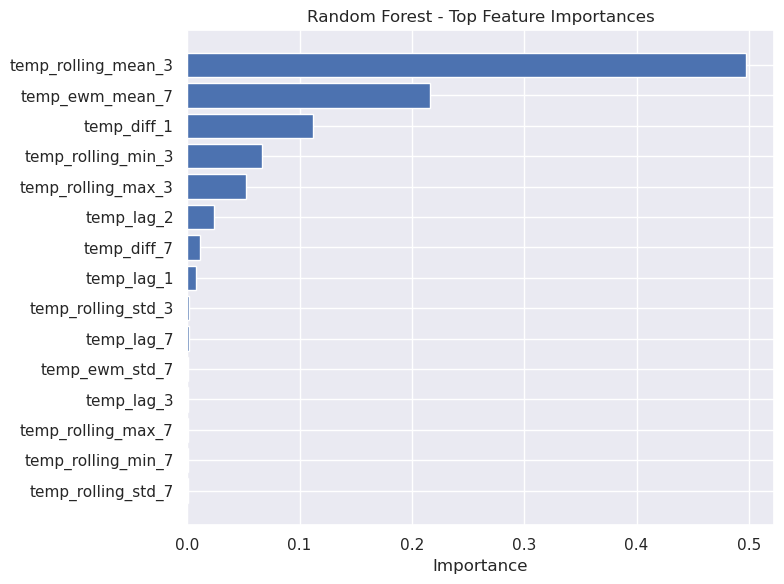


‚úÖ Random Forest training completed!
- RF h·ªçc t·ªët quan h·ªá phi tuy·∫øn/phi tham s·ªë, th∆∞·ªùng c·∫£i thi·ªán l·ªói so v·ªõi Linear Regression.
- C√≥ th·ªÉ tune nhanh: n_estimators, max_depth, min_samples_leaf ƒë·ªÉ t·ªëi ∆∞u th√™m.


In [31]:
# ============================
# TRAIN & EVALUATE RANDOM FOREST
# ============================

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# (N·∫øu ·ªü tr√™n b·∫°n ƒë√£ c√≥ evaluate_model th√¨ ƒëo·∫°n d∆∞·ªõi s·∫Ω ghi ƒë√® c√πng logic ‚Äî kh√¥ng sao)
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\nüìä {model_name} Evaluation:")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R¬≤   : {r2:.4f}")
    return mae, rmse, r2

# Kh·ªüi t·∫°o RF (m·∫∑c ƒë·ªãnh ƒë√£ kh√° m·∫°nh; c√≥ th·ªÉ tune sau)
rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

print("\n===== TRAINING RANDOM FOREST =====")
rf.fit(X_train_scaled, y_train)

# D·ª± ƒëo√°n
y_pred_train_rf = rf.predict(X_train_scaled)
y_pred_test_rf  = rf.predict(X_test_scaled)

# ƒê√°nh gi√°
train_scores_rf = evaluate_model(y_train, y_pred_train_rf, "Random Forest (Train)")
test_scores_rf  = evaluate_model(y_test,  y_pred_test_rf,  "Random Forest (Test)")

# Bi·ªÉu ƒë·ªì d·ª± b√°o
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Actual", color="tab:blue")
plt.plot(y_pred_test_rf, label="RF Predicted", color="tab:green", alpha=0.9)
plt.title("üå≤ Random Forest - Actual vs Predicted (Test set)")
plt.xlabel("Days")
plt.ylabel("Minimum Temperature (¬∞C)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================
# FEATURE IMPORTANCE
# ============================

importances = rf.feature_importances_
fi_df = pd.DataFrame({
    "Feature": X_train_scaled.columns,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print("\n===== TOP 15 FEATURE IMPORTANCE (RF) =====")
print(fi_df.head(15))

# V·∫Ω Top 15 features
topk = 15
plt.figure(figsize=(8, 6))
plt.barh(fi_df["Feature"].head(topk)[::-1], fi_df["Importance"].head(topk)[::-1])
plt.xlabel("Importance")
plt.title("Random Forest - Top Feature Importances")
plt.tight_layout()
plt.show()

print("\n‚úÖ Random Forest training completed!")
print("- RF h·ªçc t·ªët quan h·ªá phi tuy·∫øn/phi tham s·ªë, th∆∞·ªùng c·∫£i thi·ªán l·ªói so v·ªõi Linear Regression.")
print("- C√≥ th·ªÉ tune nhanh: n_estimators, max_depth, min_samples_leaf ƒë·ªÉ t·ªëi ∆∞u th√™m.")


### XGBoost


===== TRAINING XGBOOST =====

üìä XGBoost (Train) Evaluation:
MAE  : 0.0868
RMSE : 0.1108
R¬≤   : 0.9992

üìä XGBoost (Test) Evaluation:
MAE  : 0.2112
RMSE : 0.2864
R¬≤   : 0.9951


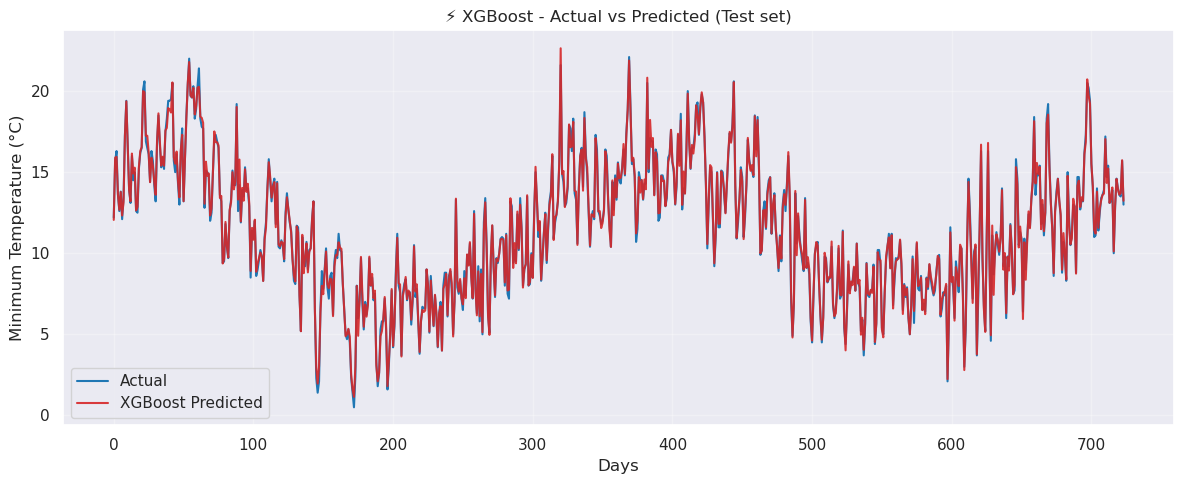

In [ ]:
# ============================
# TRAIN & EVALUATE XGBOOST + SUMMARY
# ============================

# C√†i n·∫øu thi·∫øu: pip install xgboost
try:
    from xgboost import XGBRegressor
except ImportError as e:
    raise SystemExit("‚ö†Ô∏è Ch∆∞a c√†i xgboost. Ch·∫°y: pip install xgboost")

# Kh·ªüi t·∫°o XGBoost (tham s·ªë an to√†n, d·ªÖ h·ªôi t·ª•; c√≥ th·ªÉ tune th√™m)
xgb = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

print("\n===== TRAINING XGBOOST =====")
xgb.fit(X_train_scaled, y_train)

# D·ª± ƒëo√°n
y_pred_train_xgb = xgb.predict(X_train_scaled)
y_pred_test_xgb  = xgb.predict(X_test_scaled)

# ƒê√°nh gi√°
train_scores_xgb = evaluate_model(y_train, y_pred_train_xgb, "XGBoost (Train)")
test_scores_xgb  = evaluate_model(y_test,  y_pred_test_xgb,  "XGBoost (Test)")

# Bi·ªÉu ƒë·ªì d·ª± b√°o ri√™ng XGBoost
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Actual", color="tab:blue")
plt.plot(y_pred_test_xgb, label="XGBoost Predicted", color="tab:red", alpha=0.9)
plt.title("‚ö° XGBoost - Actual vs Predicted (Test set)")
plt.xlabel("Days")
plt.ylabel("Minimum Temperature (¬∞C)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## So s√°nh t·ªïng h·ª£p 3 m√¥ h√¨nh


=== So s√°nh t·ªïng h·ª£p (th·∫•p h∆°n ‚Üí t·ªët h∆°n) ===
               Model           MAE          RMSE        R2
0  Linear Regression  3.682444e-15  4.809064e-15  1.000000
1            XGBoost  2.111824e-01  2.864006e-01  0.995120
2      Random Forest  2.235977e-01  3.468140e-01  0.992844


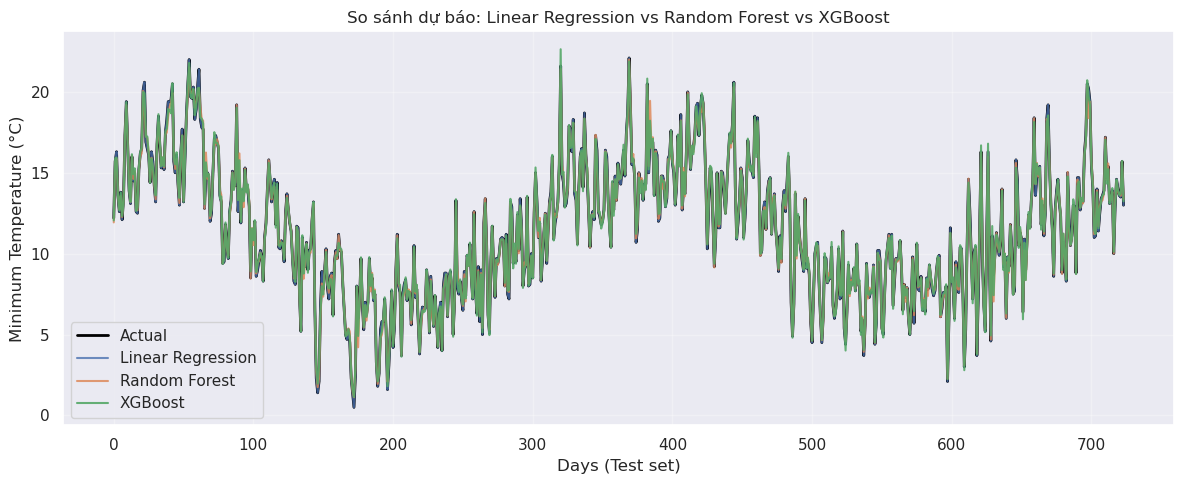

- Linear Regression ƒëang c√≥ RMSE th·∫•p nh·∫•t trong 3 m√¥ h√¨nh.
- Linear Regression nhanh, d·ªÖ gi·∫£i th√≠ch nh∆∞ng h·∫°n ch·∫ø v·ªõi quan h·ªá phi tuy·∫øn.
- Random Forest h·ªçc phi tuy·∫øn t·ªët, √≠t c·∫ßn chu·∫©n h√≥a, th∆∞·ªùng ·ªïn ƒë·ªãnh.
- XGBoost th∆∞·ªùng th·∫Øng nh·ªù boosting, nh∆∞ng c·∫ßn ch·ªânh tham s·ªë (n_estimators, learning_rate, max_depth...).


In [ ]:
# ============================
# SO S√ÅNH T·ªîNG H·ª¢P 3 M√î H√åNH
# ============================

# ƒë·∫£m b·∫£o ƒë√£ c√≥ c√°c bi·∫øn d·ª± ƒëo√°n t·ª´ c√°c b∆∞·ªõc tr∆∞·ªõc:
# - y_pred_test (Linear Regression)
# - y_pred_test_rf (Random Forest)
# - y_pred_test_xgb (XGBoost)

import numpy as np
import pandas as pd

def metrics_dict(name, y_true, y_pred):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    return {
        "Model": name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

summary_rows = [
    metrics_dict("Linear Regression", y_test, y_pred_test),
    metrics_dict("Random Forest",     y_test, y_pred_test_rf),
    metrics_dict("XGBoost",           y_test, y_pred_test_xgb),
]
summary_df = pd.DataFrame(summary_rows).sort_values("RMSE").reset_index(drop=True)

print("\n=== So s√°nh t·ªïng h·ª£p (th·∫•p h∆°n ‚Üí t·ªët h∆°n) ===")
print(summary_df)

# Bi·ªÉu ƒë·ªì so s√°nh chung 3 m√¥ h√¨nh
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Actual", linewidth=2, color="black")
plt.plot(y_pred_test,     label="Linear Regression", alpha=0.8)
plt.plot(y_pred_test_rf,  label="Random Forest",     alpha=0.8)
plt.plot(y_pred_test_xgb, label="XGBoost",           alpha=0.9)
plt.title("So s√°nh d·ª± b√°o: Linear Regression vs Random Forest vs XGBoost")
plt.xlabel("Days (Test set)")
plt.ylabel("Minimum Temperature (¬∞C)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# G·ª£i √Ω di·ªÖn gi·∫£i cho blog (in ra console)
best = summary_df.iloc[0]["Model"]
print(f"- {best} ƒëang c√≥ RMSE th·∫•p nh·∫•t trong 3 m√¥ h√¨nh.")
print("- Linear Regression nhanh, d·ªÖ gi·∫£i th√≠ch nh∆∞ng h·∫°n ch·∫ø v·ªõi quan h·ªá phi tuy·∫øn.")
print("- Random Forest h·ªçc phi tuy·∫øn t·ªët, √≠t c·∫ßn chu·∫©n h√≥a, th∆∞·ªùng ·ªïn ƒë·ªãnh.")
print("- XGBoost th∆∞·ªùng th·∫Øng nh·ªù boosting, nh∆∞ng c·∫ßn ch·ªânh tham s·ªë (n_estimators, learning_rate, max_depth...).")